# Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder

- **CRIM**: Per capita crime rate by town  

- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.  

- **INDUS**: Proportion of non-retail business acres per town  

- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  

- **NOX**: Nitric oxides concentration (parts per 10 million)  

- **RM**: Average number of rooms per dwelling  

- **AGE**: Proportion of owner-occupied units built prior to 1940  

- **DIS**: Weighted distances to five Boston employment centres  

- **RAD**: Index of accessibility to radial highways  

- **TAX**: Full-value property-tax rate per $10,000  

- **PTRATIO**: Pupil-teacher ratio by town  

- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  

- **LSTAT**: Percentage of lower status of the population  

- **MEDV**: Median value of owner-occupied homes in $1000's  

# Load the Dataset

In [2]:
# Fetch the dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Column names
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create a DataFrame for the features
df = pd.DataFrame(data, columns=feature_names)

# Add the target variable (MEDV) to the DataFrame
df["MEDV"] = target

# Display the dataset
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Handling Missing Values

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Visualizing Key Features

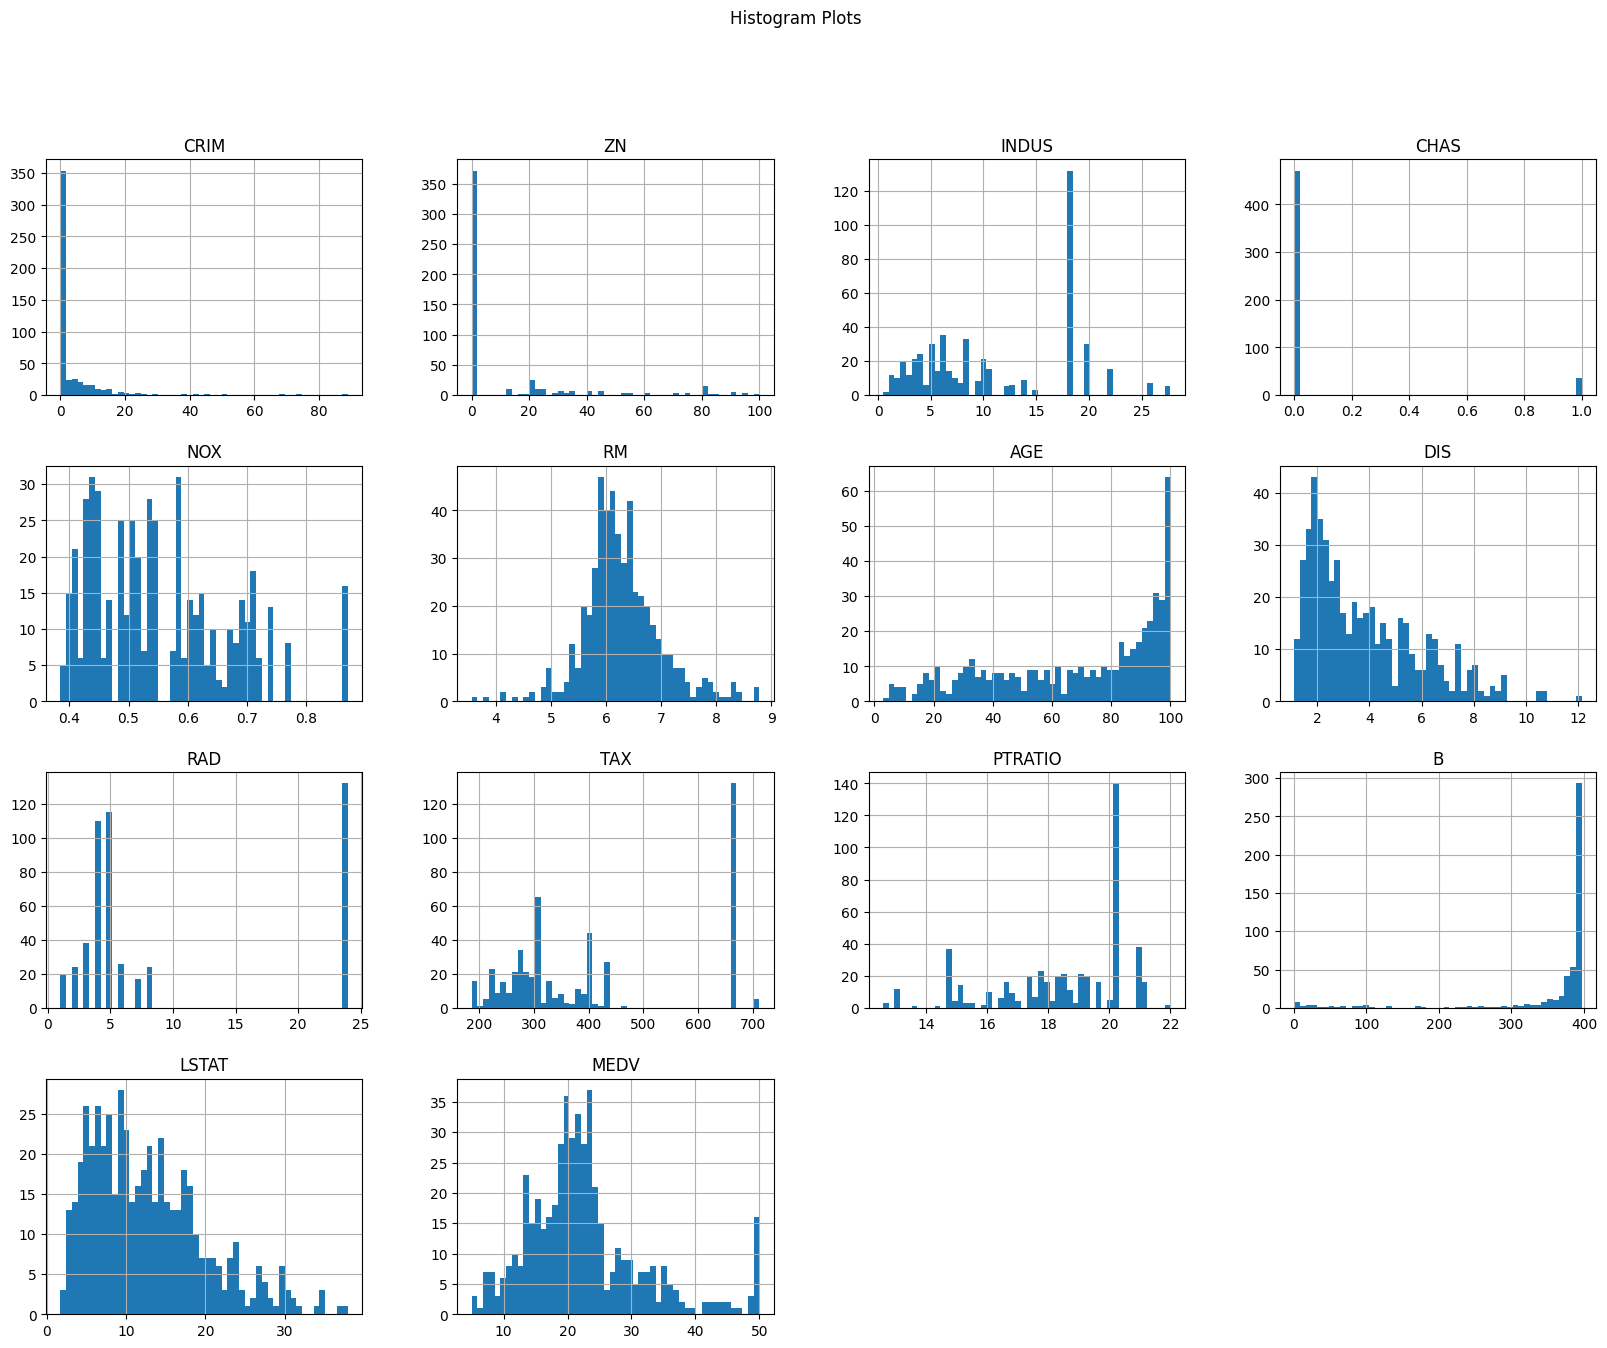

In [4]:
# Plot histograms for all numerical features
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Histogram Plots")
plt.show()

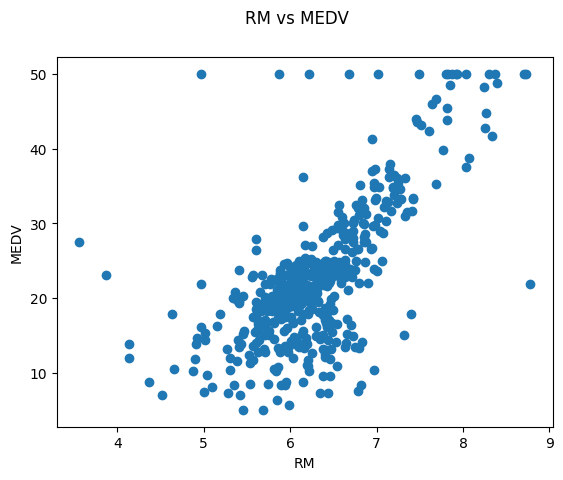

In [5]:
# Scatter plot of MEDV vs RM
plt.scatter(df['RM'], df['MEDV'])
plt.suptitle("RM vs MEDV")
plt.xlabel('RM')
plt.ylabel("MEDV")
plt.show()

# Apply Feature Scaling

In [6]:
# CRIM, ZN, TAX, B features for Min-Max Normalization (values between 0 to 1)
# Left-Right skewed values with large scale

cols = ["CRIM", "ZN", "TAX", "B"]

for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    # Min-Max Normalization formula
    df[col] = (df[col] - minimum) / (maximum - minimum)


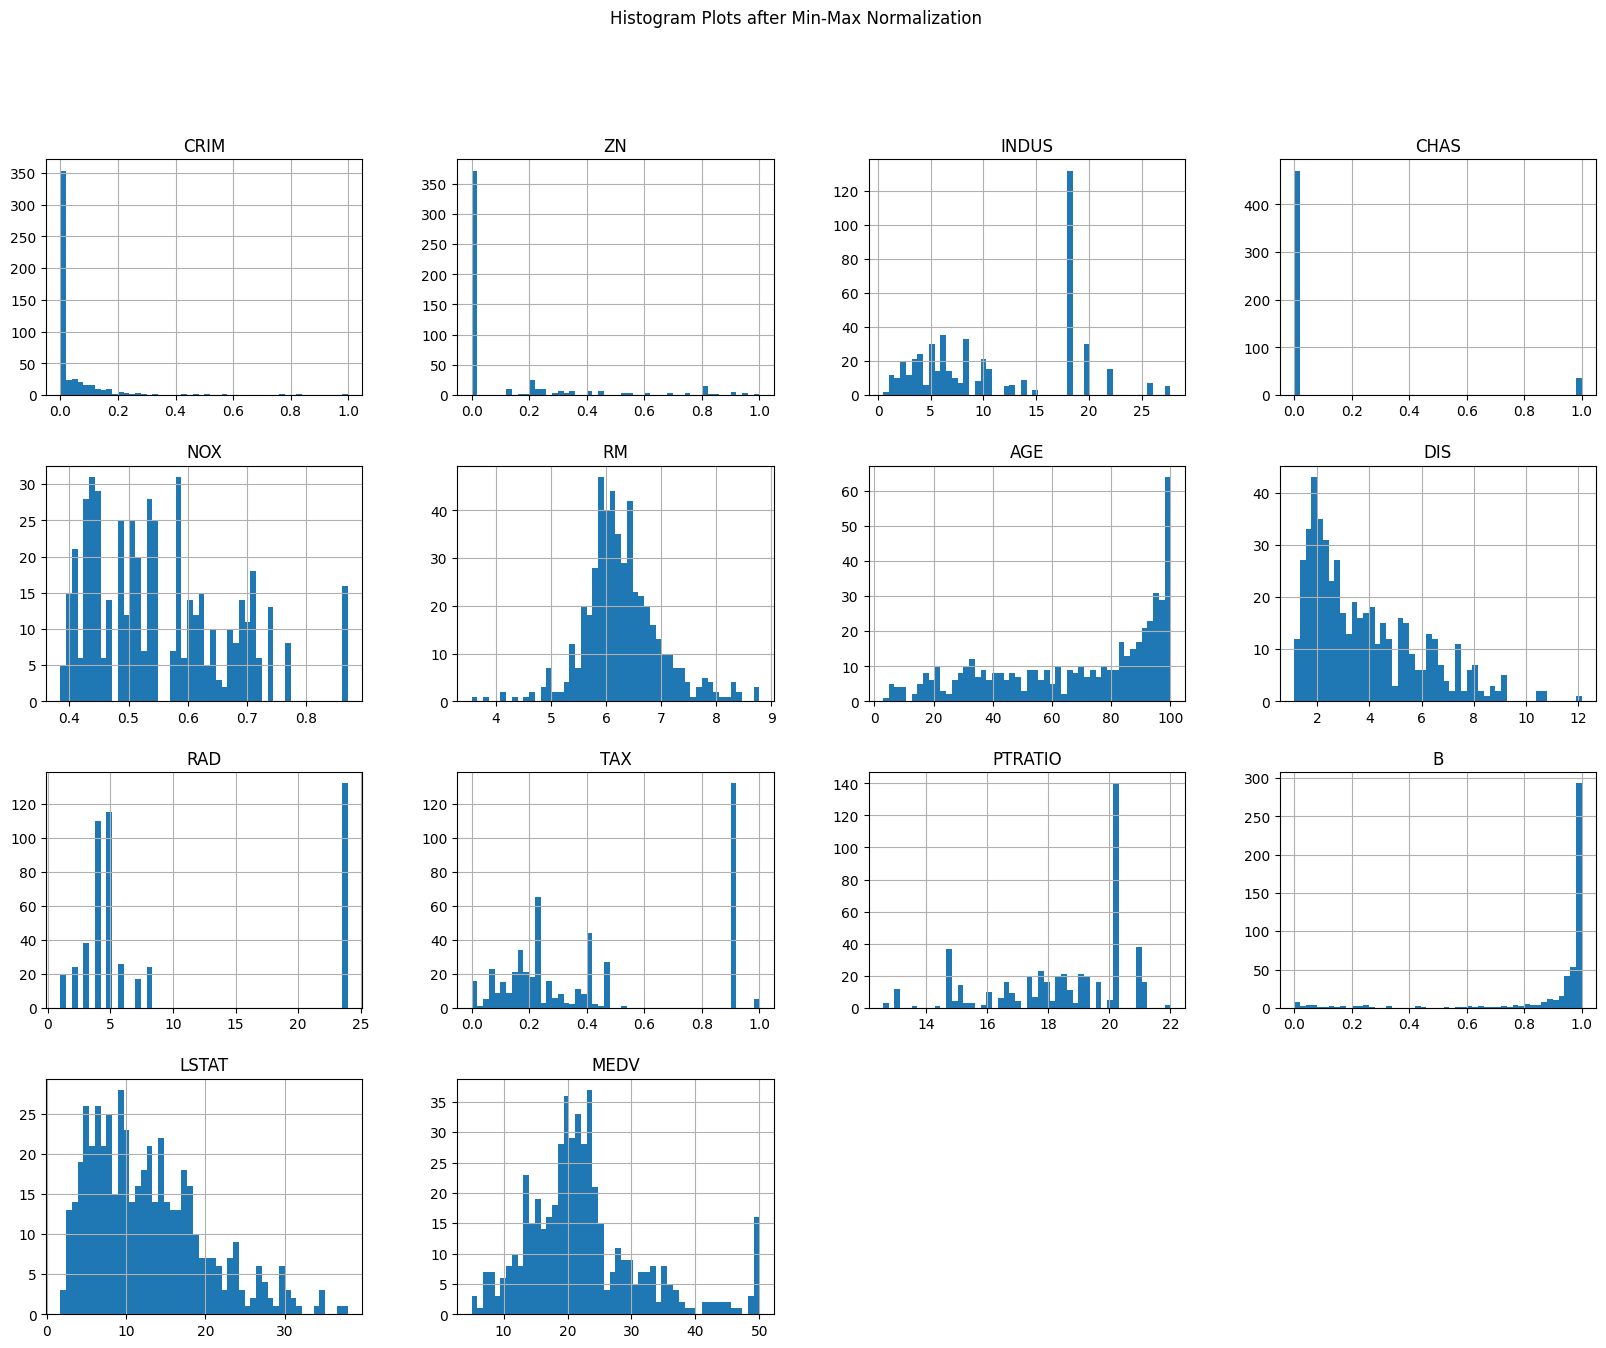

In [7]:
# Checking Min-Max Normalization Histogram
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Histogram Plots after Min-Max Normalization")
plt.show()

# One-Hot Encoding

### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)